In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MultiLabelBinarizer, Normalizer, RobustScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import *

import nbimporter
import correlation_matrix_kmeans_functions
import math
from sklearn.feature_extraction import DictVectorizer

Importing Jupyter notebook from correlation_matrix_kmeans_functions.ipynb


In [2]:
data = pd.read_csv('C:/Users/eleni.tziaferi/Desktop/grocery_data/order_products__train.csv')
orders = pd.read_csv('C:/Users/eleni.tziaferi/Desktop/grocery_data/orders.csv')

In [3]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
data.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
df = pd.merge(orders, data, how='left', on='order_id')
df = df.groupby(['user_id', 'order_id']).agg({'eval_set':'first', 'order_number':'max', 'order_dow':'max',
                                              'order_hour_of_day':'mean', 'days_since_prior_order':'mean', 
                                              'product_id':'count','add_to_cart_order':'count',  'reordered':'sum' }).fillna(0)

In [6]:
group_by_user = (df.reset_index()).groupby(['user_id']).agg({'order_id':'count', 'order_number':'max', 'order_dow':'max',
                                                            'order_hour_of_day':'mean', 'days_since_prior_order':'mean',
                                                            'product_id':'sum', 'add_to_cart_order':'sum',  'reordered':'mean'})

In [7]:
group_by_user = group_by_user.drop(['order_number'], axis=1).reset_index()

In [8]:
group_by_user.drop(['user_id'], inplace=True, axis=1, errors='ignore')

### Correlation Matrix

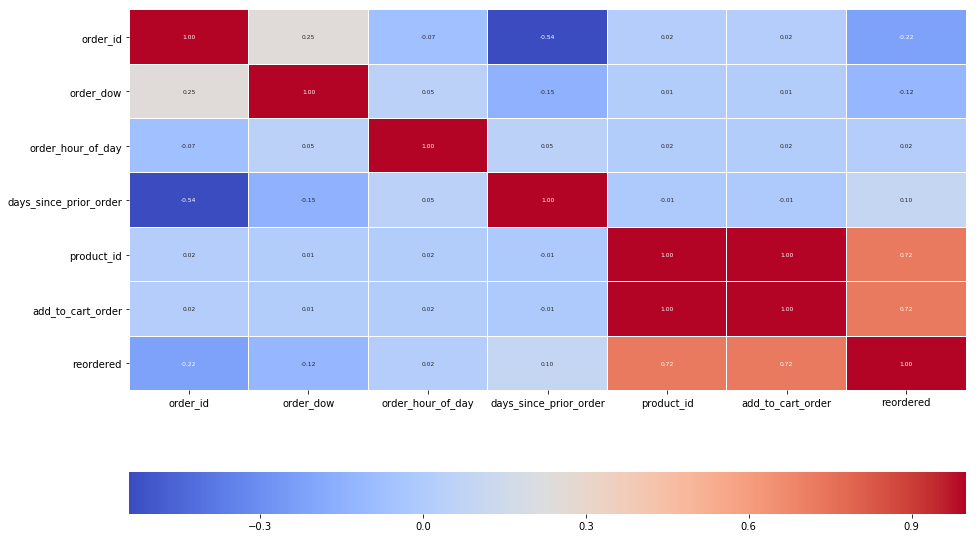

In [9]:
correlation_matrix = correlation_matrix_kmeans_functions.correlation_matrix()
correlation_plot = correlation_matrix.plot_correlation_heatmap(group_by_user)

### PCA

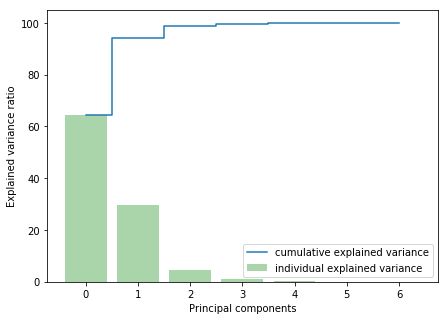

C:\Users\eleni.tziaferi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eleni.tziaferi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
pca = correlation_matrix_kmeans_functions.pca(group_by_user, 0.8, True)
pca_analysis_plot = pca.pca_analysis()

### Sihlouette

NameError: name 'clustering_algorithm' is not defined

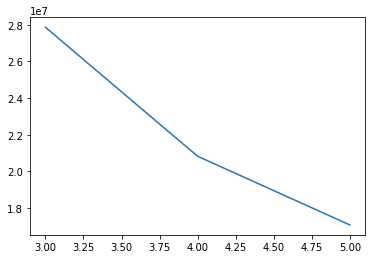

In [20]:
sihlouette = correlation_matrix_kmeans_functions.elbow_method_for_optimum_num_of_clusters()
sihlouette.elbow_method(3, 6, group_by_user.iloc[:, :5])

In [21]:
kmeans_list_metrics = []

for num_of_clusters in range(3, 6):

    kmeans = KMeans(n_clusters= int(num_of_clusters), init='k-means++', n_init=10,  random_state=42, verbose=0)
    predictions = kmeans.fit_predict(group_by_user)
    centers = kmeans.cluster_centers_
    wcss = kmeans.inertia_
    num_jobs = kmeans.n_iter_
    silhouette = silhouette_score(group_by_user, predictions, 'euclidean')

    kmeans_list_metrics.append({'clusters': num_of_clusters, 'silhouette': silhouette,
                                'error': wcss, 'num_jobs': num_jobs})

    if print_optimum_metrics is True:
        print("For n_clusters = {}, silhouette score is {}, cluster_errors is {}, "
              "n_jobs {})".format(num_of_clusters, silhouette, wcss, num_jobs))

NameError: name 'print_optimum_metrics' is not defined